Петрова Диана ЭН2-04
Лабораторная работа №2, Вариант - 9

In [2]:
!pip install pandapower
!pip install prettytable

In [3]:
import pandapower as pp
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
# Создание пустой сети
net=pp.create_empty_network()

# Создание узлов
bus0 = pp.create_bus(net, name = 'system', vn_kv=110)
bus1 = pp.create_bus(net, name = 'load1', vn_kv = 110)
bus2 = pp.create_bus(net, name = 'load2', vn_kv = 110)
bus3 = pp.create_bus(net, name = 'load3', vn_kv = 110)
bus4 = pp.create_bus(net, name = 'load4', vn_kv = 10)
bus5 = pp.create_bus(net, name = 'load5', vn_kv = 10)
bus6 = pp.create_bus(net, name = 'load6', vn_kv = 10)
bus7 = pp.create_bus(net, name = 'load7', vn_kv = 10)
bus8 = pp.create_bus(net, name = 'load8', vn_kv = 10)

# Добавочные узлы
bus08 = pp.create_bus(net, name = 'load08', vn_kv = 110)
bus35 = pp.create_bus(net, name = 'load35', vn_kv = 110)
bus34 = pp.create_bus(net, name = 'load34', vn_kv = 110)

# Создание энергосистемы 
pp.create_ext_grid(net, bus = bus0, vm_pu = 1.02) 
 
# Создание нагрузки  
pp.create_load(net, bus = bus1, p_mw = 14.5, q_mvar = 10.9)
pp.create_load(net, bus = bus2, p_mw = 22, q_mvar = 25)   
pp.create_load(net, bus = bus3, p_mw = 28, q_mvar = 23.5)   
pp.create_load(net, bus = bus4, p_mw = 4, q_mvar = 3)   
pp.create_load(net, bus = bus5, p_mw = 3, q_mvar = 1)   
pp.create_load(net, bus = bus6, p_mw = 4, q_mvar = 5)   
pp.create_load(net, bus = bus7, p_mw = 3.5, q_mvar = 1.1)   
pp.create_load(net, bus = bus8, p_mw = 5, q_mvar = 2.6)  

# Создание нагрузочного трансформатора 1
# Трансфотрматор ТДН-32000/110- У1, УХЛ1
# vk_percent Напр кз, i0_percent Ток хх %,  pfe_kw Потери кВт кз, vkr_percent отнош потери мощности кз на полную мощн
trafo1=pp.create_transformer_from_parameters(net, hv_bus=bus08, lv_bus=bus8, sn_mva = 32,
vn_hv_kv = 110, vn_lv_kv = 10, vk_percent = 10.5, i0_percent = 0.28, pfe_kw = 160, vkr_percent = (160/320))

# Создание нагрузочного трансформатора 2
# Трансфотрматор ТД-40000/110-У1
# vk_percent Напр кз, i0_percent Ток хх %,  pfe_kw Потери кВт кз, vkr_percent отнош потери мощности кз на полную мощн
trafo2=pp.create_transformer_from_parameters(net, hv_bus=bus35, lv_bus=bus5, sn_mva = 40,
vn_hv_kv = 110, vn_lv_kv = 10, vk_percent = 11, i0_percent = 0.3, pfe_kw = 170, vkr_percent = (170/400))

# Создание нагрузочного трансформатора 3
# Трансфотрматор ТД-40000/110-У1
# vk_percent Напр кз, i0_percent Ток хх %,  pfe_kw Потери кВт кз, vkr_percent отнош потери мощности кз на полную мощн
trafo3=pp.create_transformer_from_parameters(net, hv_bus=bus34, lv_bus=bus4, sn_mva = 40,
vn_hv_kv = 110, vn_lv_kv = 10, vk_percent = 11, i0_percent = 0.3, pfe_kw = 170, vkr_percent = (170/400))

In [ ]:
# Создание электрической линии 
# r_ohm_per_km (float) - сопротивление линии в Ом на км, x_ohm_per_km (float) - реактивное сопротивление линии в Ом на км
line1=pp.create_line_from_parameters(net, from_bus=bus0, to_bus=bus08, length_km=6.1, r_ohm_per_km=0.46, 
                                    x_ohm_per_km=0.275, max_i_ka= 0.265, c_nf_per_km=0)
line2=pp.create_line_from_parameters(net, from_bus=bus3, to_bus=bus35, length_km=9.6, r_ohm_per_km=0.46, 
                                    x_ohm_per_km=0.275, max_i_ka= 0.265, c_nf_per_km=0)
line3=pp.create_line_from_parameters(net, from_bus=bus3, to_bus=bus34, length_km=8.7, r_ohm_per_km=0.46, 
                                    x_ohm_per_km=0.275, max_i_ka= 0.265, c_nf_per_km=0)
line4=pp.create_line_from_parameters(net, from_bus=bus1, to_bus=bus2, length_km=1.4, r_ohm_per_km=0.33, 
                                    x_ohm_per_km=0.234, max_i_ka= 0.33, c_nf_per_km=0)
line5=pp.create_line_from_parameters(net, from_bus=bus8, to_bus=bus7, length_km=1.1, r_ohm_per_km=0.12, 
                                    x_ohm_per_km=0.378, max_i_ka= 0.605, c_nf_per_km=0)
line6=pp.create_line_from_parameters(net, from_bus=bus5, to_bus=bus6, length_km=1.3, r_ohm_per_km=0.157, 
                                    x_ohm_per_km=0.377, max_i_ka= 0.51, c_nf_per_km=0)
line7=pp.create_line_from_parameters(net, from_bus=bus0, to_bus=bus1, length_km=1.2, r_ohm_per_km=0.33, 
                                    x_ohm_per_km=0.234, max_i_ka= 0.33, c_nf_per_km=0)
# Создание конденсаторных батарей
pp.create_switch(net, bus=bus2, element=bus3, et="b", closed=True)
pp.create_switch(net, bus=bus4, element=bus5, et="b", closed=True)
pp.create_switch(net, bus=bus7, element=bus6, et="b", closed=True)
pp.runpp(net)

In [6]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-85.262197,-73.376904
1,1.016005,0.022021,14.500000,10.900000
2,1.012180,0.046596,22.000000,25.000000
3,1.012180,0.046596,28.000000,23.500000
4,0.999353,-0.855978,4.000000,3.000000
5,0.999353,-0.855978,3.000000,1.000000
6,0.976517,-1.859558,4.000000,5.000000
7,0.976517,-1.859558,3.500000,1.100000
8,0.995343,-1.414146,5.000000,2.600000
9,1.017258,0.021197,0.000000,0.000000


In [7]:
x= net.res_bus.vm_pu.index
y =net.res_bus.vm_pu
x=x[1:8]
y=y[1:8]

In [8]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,8.155099,6.530635,-8.130769,-6.516090,0.024330,0.014545,0.053761,0.053761,0.053761,1.020000,0.000000,1.017258,0.021197,20.287201
1,6.003124,3.469620,-5.985998,-3.459381,0.017126,0.010238,0.035954,0.035954,0.035954,1.012180,0.046596,1.009268,0.044156,13.567695
2,6.018107,3.561217,-6.002321,-3.551779,0.015786,0.009438,0.036261,0.036261,0.036261,1.012180,0.046596,1.009518,0.045918,13.683490
3,62.279512,55.713982,-62.021231,-55.530837,0.258282,0.183145,0.431683,0.431683,0.431683,1.016005,0.022021,1.012180,0.046596,130.813079
4,2.952582,3.576441,-2.923924,-3.486169,0.028658,0.090272,0.269013,0.269013,0.269013,0.995343,-1.414146,0.976517,-1.859558,44.464954
5,4.635519,2.756570,-4.576076,-2.613831,0.059443,0.142739,0.311579,0.311579,0.311579,0.999353,-0.855978,0.976517,-1.859558,61.093870
6,77.107097,66.846269,-76.779512,-66.613982,0.327585,0.232288,0.525114,0.525114,0.525114,1.020000,0.000000,1.016005,0.022021,159.125531


In [ ]:
# Оформи этот блок код более красиво, каждый параметр
# должен располагаться на отдельной строчке
# длина строки не должна превышать 60 символов

# Рассчитываем потери на линиях при мощности КУ 0%
# Со стороны высокого напряжения
line_pw_0percent_110=net.res_line.pl_mw
line_qw_0percent_110=net.res_line.ql_mvar
Sum_line_pw_0percent_110=sum(line_pw_0percent_110[0:4])+sum(line_pw_0percent_110[6:7])
Sum_line_qw_0percent_110=sum(line_qw_0percent_110[0:4])+sum(line_qw_0percent_110[6:7])
Sum_line_all_0percent_110=math.sqrt(pow(Sum_line_pw_0percent_110,2)+pow(Sum_line_qw_0percent_110,2))
# Со стороны низкого напряжения
line_pw_0percent_10=net.res_line.pl_mw
line_qw_0percent_10=net.res_line.ql_mvar
Sum_line_pw_0percent_10=sum(line_pw_0percent_10[4:6])
Sum_line_qw_0percent_10=sum(line_qw_0percent_10[4:6])
Sum_line_all_0percent_10=math.sqrt(pow(Sum_line_pw_0percent_10,2)+pow(Sum_line_qw_0percent_10,2))
# Суммарные потери
Sum_line_all_0percent=(Sum_line_all_0percent_110 + Sum_line_all_0percent_10)
print(Sum_line_all_0percent_110, Sum_line_all_0percent_10, Sum_line_all_0percent)

0.6697812825013048 0.1832222239068434 0.8530035064081481


In [10]:
# Мощность 25%
pp.create_shunt_as_capacitor(net, bus=bus4, q_mvar=3*0.25, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus5, q_mvar=1*0.25, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus7, q_mvar=1.1*0.25, loss_factor=0, in_servise=True)
pp.runpp(net)

In [11]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-85.247019,-72.066558
1,1.016030,0.020102,14.500000,10.900000
2,1.012233,0.042419,22.000000,25.000000
3,1.012233,0.042419,28.000000,23.500000
4,1.000958,-0.872310,4.000000,2.248563
5,1.000958,-0.872310,3.000000,0.749521
6,0.978339,-1.877860,4.000000,5.000000
7,0.978339,-1.877860,3.500000,0.836784
8,0.996165,-1.416969,5.000000,2.600000
9,1.017293,0.018123,0.000000,0.000000


In [12]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,8.148096,6.286434,-8.124489,-6.272321,0.023607,0.014113,0.052956,0.052956,0.052956,1.020000,0.000000,1.017293,0.018123,19.983456
1,6.000742,2.941937,-5.984833,-2.932426,0.015909,0.009511,0.034653,0.034653,0.034653,1.012233,0.042419,1.009436,0.029210,13.076712
2,6.021170,3.029034,-6.006506,-3.020267,0.014665,0.008767,0.034949,0.034949,0.034949,1.012233,0.042419,1.009674,0.031840,13.188317
3,62.275826,54.651018,-62.021913,-54.470971,0.253913,0.180047,0.428017,0.428017,0.428017,1.016030,0.020102,1.012233,0.042419,129.702098
4,2.946650,3.342889,-2.920236,-3.259684,0.026414,0.083205,0.258269,0.258269,0.258269,0.996165,-1.416969,0.978339,-1.877860,42.689058
5,4.638651,2.718504,-4.579764,-2.577100,0.058887,0.141404,0.310119,0.310119,0.310119,1.000958,-0.872310,0.978339,-1.877860,60.807568
6,77.098923,65.780123,-76.775826,-65.551018,0.323097,0.229105,0.521505,0.521505,0.521505,1.020000,0.000000,1.016030,0.020102,158.031848


In [13]:
# Рассчитываем потери на линиях при мощности КУ 25%
# Со стороны высокого напряжения
line_pw_25percent_110=net.res_line.pl_mw
line_qw_25percent_110=net.res_line.ql_mvar
Sum_line_pw_25percent_110=sum(line_pw_25percent_110[0:4])+sum(line_pw_25percent_110[6:7])
Sum_line_qw_25percent_110=sum(line_qw_25percent_110[0:4])+sum(line_qw_25percent_110[6:7])
Sum_line_all_25percent_110=math.sqrt(pow(Sum_line_pw_25percent_110,2)+pow(Sum_line_qw_25percent_110,2))
# Со стороны низкого напряжения
line_pw_25percent_10=net.res_line.pl_mw
line_qw_25percent_10=net.res_line.ql_mvar
Sum_line_pw_25percent_10=sum(line_pw_25percent_10[4:6])
Sum_line_qw_25percent_10=sum(line_qw_25percent_10[4:6])
Sum_line_all_25percent_10=math.sqrt(pow(Sum_line_pw_25percent_10,2)+pow(Sum_line_qw_25percent_10,2))
# Суммарные потери
Sum_line_all_25percent=(Sum_line_all_25percent_110 + Sum_line_all_25percent_10)
print(Sum_line_all_25percent_110, Sum_line_all_25percent_10, Sum_line_all_25percent)

0.7703004404492689 0.24026136620069086 1.0105618066499598


In [14]:
# Мощность 50%
pp.create_shunt_as_capacitor(net, bus=bus4, q_mvar=3*0.5, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus5, q_mvar=1*0.5, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus7, q_mvar=1.1*0.5, loss_factor=0, in_servise=True)
pp.runpp(net)

In [15]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-85.219133,-69.433004
1,1.016079,0.016243,14.500000,10.900000
2,1.012340,0.034021,22.000000,25.000000
3,1.012340,0.034021,28.000000,23.500000
4,1.004182,-0.905154,4.000000,0.731140
5,1.004182,-0.905154,3.000000,0.243713
6,0.982002,-1.914685,4.000000,5.000000
7,0.982002,-1.914685,3.500000,0.304429
8,0.997818,-1.422739,5.000000,2.600000
9,1.017363,0.011940,0.000000,0.000000


In [16]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,8.134579,5.795560,-8.112343,-5.782267,0.022236,0.013293,0.051395,0.051395,0.051395,1.020000,0.000000,1.017363,0.011940,19.394501
1,5.996738,1.881253,-5.982671,-1.872844,0.014067,0.008409,0.032585,0.032585,0.032585,1.012340,0.034021,1.009773,-0.000830,12.296259
2,6.028117,1.959313,-6.015150,-1.951561,0.012966,0.007752,0.032863,0.032863,0.032863,1.012340,0.034021,1.009988,0.003543,12.401203
3,62.270250,52.514573,-62.024854,-52.340566,0.245395,0.174008,0.420777,0.420777,0.420777,1.016079,0.016243,1.012340,0.034021,127.508081
4,2.935150,2.872205,-2.912791,-2.801775,0.022359,0.070430,0.237617,0.237617,0.237617,0.997818,-1.422739,0.982002,-1.914685,39.275504
5,4.645001,2.641431,-4.587209,-2.502655,0.057793,0.138776,0.307223,0.307223,0.307223,1.004182,-0.905154,0.982002,-1.914685,60.239856
6,77.084555,63.637444,-76.770250,-63.414573,0.314305,0.222871,0.514360,0.514360,0.514360,1.020000,0.000000,1.016079,0.016243,155.866728


In [17]:
# Рассчитываем потери на линиях при мощности КУ 50%
# Со стороны высокого напряжения
line_pw_50percent_110=net.res_line.pl_mw
line_qw_50percent_110=net.res_line.ql_mvar
Sum_line_pw_50percent_110=sum(line_pw_50percent_110[0:4])+sum(line_pw_50percent_110[6:7])
Sum_line_qw_50percent_110=sum(line_qw_50percent_110[0:4])+sum(line_qw_50percent_110[6:7])
Sum_line_all_50percent_110=math.sqrt(pow(Sum_line_pw_50percent_110,2)+pow(Sum_line_qw_50percent_110,2))
# Со стороны низкого напряжения
line_pw_50percent_10=net.res_line.pl_mw
line_qw_50percent_10=net.res_line.ql_mvar
Sum_line_pw_50percent_10=sum(line_pw_50percent_10[4:6])
Sum_line_qw_50percent_10=sum(line_qw_50percent_10[4:6])
Sum_line_all_50percent_10=math.sqrt(pow(Sum_line_pw_50percent_10,2)+pow(Sum_line_qw_50percent_10,2))
# Суммарные потери
Sum_line_all_50percent=(Sum_line_all_50percent_110 + Sum_line_all_50percent_10)
print(Sum_line_all_50percent_110, Sum_line_all_50percent_10, Sum_line_all_50percent)

0.7433728902438449 0.22403468617178177 0.9674075764156267


In [18]:
# Мощность 75%
pp.create_shunt_as_capacitor(net, bus=bus4, q_mvar=3*0.75, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus5, q_mvar=1*0.75, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus7, q_mvar=1.1*0.75, loss_factor=0, in_servise=True)
pp.runpp(net)

In [19]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-85.183607,-65.450216
1,1.016153,0.010401,14.500000,10.900000
2,1.012500,0.021310,22.000000,25.000000
3,1.012500,0.021310,28.000000,23.500000
4,1.009058,-0.954867,4.000000,-1.581894
5,1.009058,-0.954867,3.000000,-0.527298
6,0.987542,-1.970481,4.000000,5.000000
7,0.987542,-1.970481,3.500000,-0.509145
8,1.000316,-1.431703,5.000000,2.600000
9,1.017468,0.002577,0.000000,0.000000


In [20]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,8.115553,5.053006,-8.095181,-5.040828,0.020372,0.012179,0.049194,0.049194,0.049194,1.020000,0.000000,1.017468,0.002577,18.563593
1,5.992666,0.276803,-5.979854,-0.269144,0.012812,0.007659,0.031098,0.031098,0.031098,1.012500,0.021310,1.010281,-0.046267,11.735147
2,6.040626,0.341212,-6.028816,-0.334152,0.011810,0.007060,0.031364,0.031364,0.031364,1.012500,0.021310,1.010461,-0.039259,11.835302
3,62.266472,49.283360,-62.033293,-49.118015,0.233179,0.165345,0.410169,0.410169,0.410169,1.016153,0.010401,1.012500,0.021310,124.293755
4,2.918825,2.157108,-2.901448,-2.102371,0.017377,0.054737,0.209478,0.209478,0.209478,1.000316,-1.431703,0.987542,-1.970481,34.624479
5,4.654747,2.523424,-4.598552,-2.388484,0.056195,0.134941,0.302948,0.302948,0.302948,1.009058,-0.954867,0.987542,-1.970481,59.401601
6,77.068054,60.397210,-76.766472,-60.183360,0.301583,0.213849,0.503843,0.503843,0.503843,1.020000,0.000000,1.016153,0.010401,152.679565


In [21]:
# Рассчитываем потери на линиях при мощности КУ 75%
# Со стороны высокого напряжения
line_pw_75percent_110=net.res_line.pl_mw
line_qw_75percent_110=net.res_line.ql_mvar
Sum_line_pw_75percent_110=sum(line_pw_75percent_110[0:4])+sum(line_pw_75percent_110[6:7])
Sum_line_qw_75percent_110=sum(line_qw_75percent_110[0:4])+sum(line_qw_75percent_110[6:7])
Sum_line_all_75percent_110=math.sqrt(pow(Sum_line_pw_75percent_110,2)+pow(Sum_line_qw_75percent_110,2))
# Со стороны низкого напряжения
line_pw_75percent_10=net.res_line.pl_mw
line_qw_75percent_10=net.res_line.ql_mvar
Sum_line_pw_75percent_10=sum(line_pw_75percent_10[4:6])
Sum_line_qw_75percent_10=sum(line_qw_75percent_10[4:6])
Sum_line_all_75percent_10=math.sqrt(pow(Sum_line_pw_75percent_10,2)+pow(Sum_line_qw_75percent_10,2))
# Суммарные потери
Sum_line_all_75percent=(Sum_line_all_75percent_110 + Sum_line_all_75percent_10)
print(Sum_line_all_75percent_110, Sum_line_all_75percent_10, Sum_line_all_75percent)

0.7078331033787149 0.20344672618438253 0.9112798295630974


In [22]:
# Мощность 100%
pp.create_shunt_as_capacitor(net, bus=bus4, q_mvar=3*1, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus5, q_mvar=1*1, loss_factor=0, in_servise=True)
pp.create_shunt_as_capacitor(net, bus=bus7, q_mvar=1.1*1, loss_factor=0, in_servise=True)
pp.runpp(net)

In [23]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-85.148366,-60.078377
1,1.016253,0.002510,14.500000,10.900000
2,1.012716,0.004146,22.000000,25.000000
3,1.012716,0.004146,28.000000,23.500000
4,1.015633,-1.022002,4.000000,-4.736325
5,1.015633,-1.022002,3.000000,-1.578775
6,0.995015,-2.045932,4.000000,5.000000
7,0.995015,-2.045932,3.500000,-1.622651
8,1.003687,-1.444248,5.000000,2.600000
9,1.017610,-0.010072,0.000000,0.000000


In [24]:
x1= net.res_bus.vm_pu.index
y1 =net.res_bus.vm_pu
x1=x1[1:8]
y1=y1[1:8]

In [25]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,8.092593,4.051114,-8.074337,-4.040200,0.018256,0.010914,0.046569,0.046569,0.046569,1.020000,0.000000,1.017610,-0.010072,17.573035
1,5.990960,-1.887894,-5.976920,1.896288,0.014040,0.008394,0.032555,0.032555,0.032555,1.012716,0.004146,1.010966,-0.107562,12.284799
2,6.061324,-1.841862,-6.048382,1.849599,0.012942,0.007737,0.032833,0.032833,0.032833,1.012716,0.004146,1.011098,-0.097003,12.389646
3,62.270254,44.924805,-62.052284,-44.770244,0.217970,0.154561,0.396567,0.396567,0.396567,1.016253,0.002510,1.012716,0.004146,120.171961
4,2.898839,1.186377,-2.885983,-1.145883,0.012855,0.040494,0.180174,0.180174,0.180174,1.003687,-1.444248,0.995015,-2.045932,29.780828
5,4.668169,2.361501,-4.614017,-2.231466,0.054153,0.130036,0.297391,0.297391,0.297391,1.015633,-1.022002,0.995015,-2.045932,58.312000
6,77.055773,56.027264,-76.770254,-55.824805,0.285519,0.202459,0.490241,0.490241,0.490241,1.020000,0.000000,1.016253,0.002510,148.557741


In [26]:
# Рассчитываем потери на линиях при мощности КУ 100%
# Со стороны высокого напряжения
line_pw_100percent_110=net.res_line.pl_mw
line_qw_100percent_110=net.res_line.ql_mvar
Sum_line_pw_100percent_110=sum(line_pw_100percent_110[0:4])+sum(line_pw_100percent_110[6:7])
Sum_line_qw_100percent_110=sum(line_qw_100percent_110[0:4])+sum(line_qw_100percent_110[6:7])
Sum_line_all_100percent_110=math.sqrt(pow(Sum_line_pw_100percent_110,2)+pow(Sum_line_qw_100percent_110,2))
# Со стороны низкого напряжения
line_pw_100percent_10=net.res_line.pl_mw
line_qw_100percent_10=net.res_line.ql_mvar
Sum_line_pw_100percent_10=sum(line_pw_100percent_10[4:6])
Sum_line_qw_100percent_10=sum(line_qw_100percent_10[4:6])
Sum_line_all_100percent_10=math.sqrt(pow(Sum_line_pw_100percent_10,2)+pow(Sum_line_qw_100percent_10,2))
# Суммарные потери
Sum_line_all_100percent=(Sum_line_all_100percent_110 + Sum_line_all_100percent_10)
print(Sum_line_all_100percent_110, Sum_line_all_100percent_10, Sum_line_all_100percent)

0.6697812825013048 0.1832222239068434 0.8530035064081481


In [27]:
import pandas as pd
from prettytable import PrettyTable

In [28]:
ditable = PrettyTable()
# Добавление колонки таблицы с именем 'Мощность КУ, Мвар'
ditable.add_column("Мощность КУ, Мвар", ["0", "25%", "50%", "75%", "100%"])
# Добавление колонки таблицы с именем 'Потери на 110 кВ'
ditable.add_column("Потери на 110 кВ",
  [Sum_line_all_0percent_110, Sum_line_all_25percent_110, Sum_line_all_50percent_110, Sum_line_all_75percent_110, Sum_line_all_100percent_110])
# Добавление колонки таблицы с именем 'Потери на 10 кВ'
ditable.add_column("Потери на 10 кВ",
 [Sum_line_all_0percent_10, Sum_line_all_25percent_10, Sum_line_all_50percent_10, Sum_line_all_75percent_10, Sum_line_all_100percent_10])
# Добавление колонки таблицы с именем 'Напряжение в исследуемом узле до КУ'
ditable.add_column("Напряжение в исследуемом узле до КУ", [0.999353, 0.999353, 0.999353, 0.999353, 0.999353])
# Добавление колонки таблицы с именем 'Напряжение в исследуемом узле после КУ'
ditable.add_column("Напряжение в исследуемом узле после КУ", [0.999353, 1.000958, 1.008447, 1.012939, 1.015633])
# Добавление колонки таблицы с именем 'Суммарные потери мощности'
ditable.add_column("Суммарные потери мощности", 
[Sum_line_all_0percent, Sum_line_all_25percent, Sum_line_all_50percent, Sum_line_all_75percent, Sum_line_all_100percent])

print(ditable)

+-------------------+--------------------+---------------------+-------------------------------------+----------------------------------------+---------------------------+
| Мощность КУ, Мвар |  Потери на 110 кВ  |   Потери на 10 кВ   | Напряжение в исследуемом узле до КУ | Напряжение в исследуемом узле после КУ | Суммарные потери мощности |
+-------------------+--------------------+---------------------+-------------------------------------+----------------------------------------+---------------------------+
|         0         | 0.7847151517054807 | 0.24910959959178075 |               0.999353              |                0.999353                |     1.0338247512972614    |
|        25%        | 0.7703004404492689 | 0.24026136620069086 |               0.999353              |                1.000958                |     1.0105618066499598    |
|        50%        | 0.7433728902438449 | 0.22403468617178177 |               0.999353              |                1.008447              

In [29]:
bitable = PrettyTable()
# Добавление колонки таблицы с именем 'Мощность КУ, Мвар'
bitable.add_column("Режим", ["КУ", "Без КУ"])
# Добавление колонки таблицы с именем 'bus1'
bitable.add_column("bus1", [1.016328, 1.016005])
# Добавление колонки таблицы с именем 'bus2'
bitable.add_column("bus2", [1.012880, 1.012180])
# Добавление колонки таблицы с именем 'bus3'
bitable.add_column("bus3", [1.012880, 1.012180])
# Добавление колонки таблицы с именем 'bus4'
bitable.add_column("bus4", [1.020620, 0.999353])
# Добавление колонки таблицы с именем 'bus5'
bitable.add_column("bus5", [1.020620, 0.999353])
# Добавление колонки таблицы с именем 'bus6'
bitable.add_column("bus6", [1.000685, 0.976517])
# Добавление колонки таблицы с именем 'bus7'
bitable.add_column("bus7", [1.000685, 0.976517])

print(bitable)

+--------+----------+---------+---------+----------+----------+----------+----------+
| Режим  |   bus1   |   bus2  |   bus3  |   bus4   |   bus5   |   bus6   |   bus7   |
+--------+----------+---------+---------+----------+----------+----------+----------+
|   КУ   | 1.016328 | 1.01288 | 1.01288 | 1.02062  | 1.02062  | 1.000685 | 1.000685 |
| Без КУ | 1.016005 | 1.01218 | 1.01218 | 0.999353 | 0.999353 | 0.976517 | 0.976517 |
+--------+----------+---------+---------+----------+----------+----------+----------+


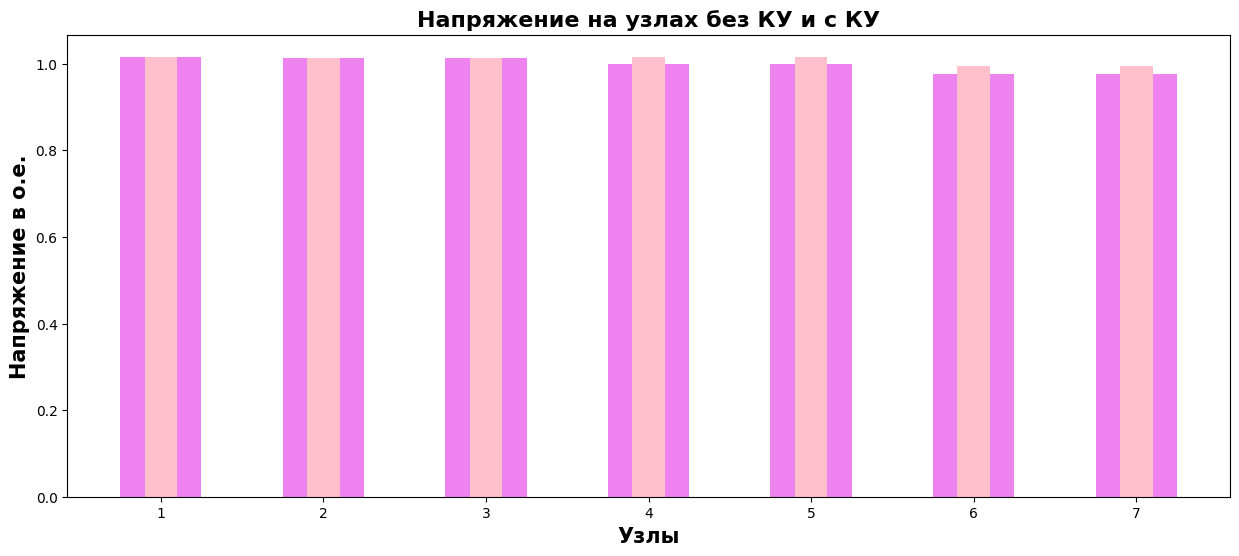

In [30]:
fig,ax=plt.subplots()
ax.bar(x,y, color = 'violet', width=0.5, label = 'Без КУ')
ax.bar(x1,y1, color = 'pink', width=0.2, label = 'С КУ') 

fig.set_figwidth(15)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('white')

plt.title("Напряжение на узлах без КУ и с КУ", fontweight="bold", fontsize=16)
plt.xlabel("Узлы", fontweight = 'bold', fontsize = 15)
plt.ylabel("Напряжение в о.е.", fontweight = 'bold', fontsize = 15)

plt.show()

Вывод: Исследовали влияние компенсирующего устройства на параметры элементов ЭЭС. При увеличении мощности компенсирующего устройства, суммарные потери мощности в линии уменьшались. Наибольшие потери составили 1.0338 кВА при мощности КУ 0%, а наименьшие 0.8221 кВА при мощности КУ 100%. Добавление компенсирующего устройства позволило уменьшить суммарные потери мощности на 0.2117 кВА. Также увеличилось напряжение в узлах при добавлении КУ.

In [31]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.020000,0.000000,-85.148366,-60.078377
1,1.016253,0.002510,14.500000,10.900000
2,1.012716,0.004146,22.000000,25.000000
3,1.012716,0.004146,28.000000,23.500000
4,1.015633,-1.022002,4.000000,-4.736325
5,1.015633,-1.022002,3.000000,-1.578775
6,0.995015,-2.045932,4.000000,5.000000
7,0.995015,-2.045932,3.500000,-1.622651
8,1.003687,-1.444248,5.000000,2.600000
9,1.017610,-0.010072,0.000000,0.000000
